<a href="https://colab.research.google.com/github/GUILLENJV/Optimizaci-n-de-Campa-as/blob/master/D_TG_Mejores_Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelos según los mejores hierparametros

In [ ]:
from numpy import unique
import numpy
import numpy as np
from numpy import array
import pandas as pd
from pandas import read_csv
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.python.keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder
from tensorflow.keras.layers import BatchNormalization
from keras.regularizers import l1, l2
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import regularizers
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
import seaborn as sns
from keras.utils import to_categorical


# Modelo 1

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Epoch 1/10
160/160 [==============================] - 5s 16ms/step - loss: 0.1663 - accuracy: 0.9294 - val_loss: 0.0897 - val_accuracy: 0.9570
Epoch 2/10
160/160 [==============================] - 2s 12ms/step - loss: 0.0719 - accuracy: 0.9675 - val_loss: 0.0660 - val_accuracy: 0.9664
Epoch 3/10
160/160 [==============================] - 2s 11ms/step - loss: 0.0617 - accuracy: 0.9720 - val_loss: 0.0624 - val_accuracy: 0.9700
Epoch 4/10
160/160 [==============================] - 2s 14ms/step - loss: 0.0557 - accuracy: 0.9749 - val_loss: 0.0641 - val_accuracy: 0.9716
Epoch 5/10
160/160 [==============================] - 3s 18ms/step - loss: 0.0500 - accuracy: 0.9785 - val_loss: 0.0663 - val_accuracy: 0.9732
Epoch 6/10
160/160 [==============================] - 2s 13ms/step - loss: 0.0450 - accuracy: 0.9803 - val_loss: 0.0673 - val_accuracy: 0.9723
Epoch 7/10
160/160 [==============================] - 2s 10ms/step - loss: 0.0408 - accuracy: 0.9824 - val_loss: 0.0692 - val_accuracy: 0.9712

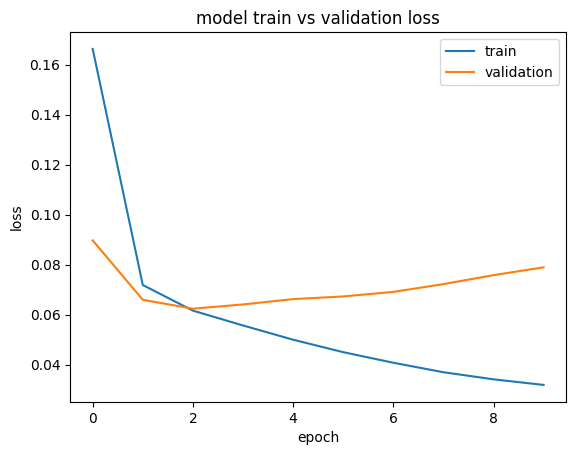

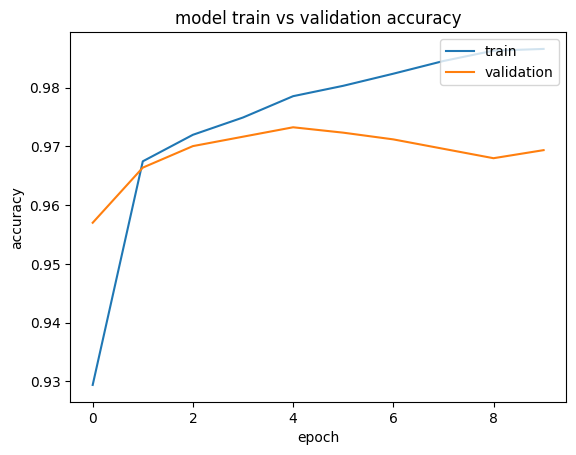

137/137 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2249
           1       0.98      0.96      0.97      2123

    accuracy                           0.97      4372
   macro avg       0.97      0.97      0.97      4372
weighted avg       0.97      0.97      0.97      4372



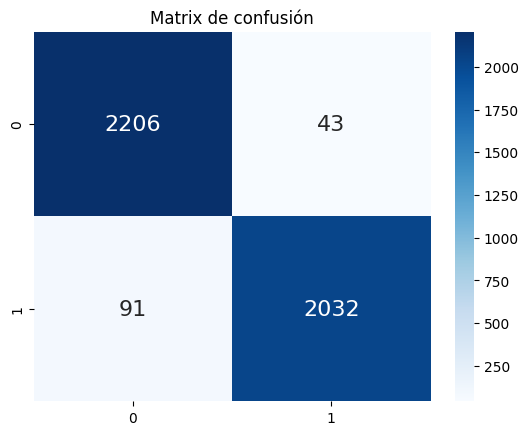

In [ ]:
df = pd.read_csv("62f1ab79cc287b001f643389_clear_final.csv")
X = df[['campaign_id',
        'traffic_source_id',
        'visitor_device_browser',
        'visitor_device_hardware_family',
        'visitor_device_hardware_model',
        'visitor_device_hardware_vendor',
        'visitor_device_os_family',
        'visitor_device_os_vendor',
        'visitor_device_os_version',
        'visitor_device_type',
        'visitor_geo_location_cityName',
        'visitor_geo_location_connection_typ',
        'visitor_geo_location_countryCode',
        'visitor_geo_location_isp',
        'visitor_geo_location_regionName',
        'visitor_tokens_adh',
        'visitor_tokens_cadid',
        'visitor_tokens_adi',
        'converted_yes',
        'converted_no']]
y = df[["landing_page_id"]]

df = pd.concat([X, y], axis=1)

# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OneHotEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
  le = LabelEncoder()
  le.fit(y_train)
  y_train_enc = le.transform(y_train)
  y_test_enc = le.transform(y_test)
  y_train_enc = to_categorical(y_train_enc)
  y_test_enc = to_categorical(y_test_enc)
  return y_train_enc, y_test_enc

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

# define the  model
model = Sequential()
model.add(Dense(250, input_dim=X_train_enc.shape[1], activation='relu',
                kernel_initializer='he_uniform'))
model.add(Dense(250, kernel_initializer = 'he_uniform',  activation = 'relu'))
model.add(Dense(2, kernel_initializer = 'he_uniform', activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])
# fit the keras model on the dataset
history=model.fit(X_train_enc, y_train_enc, epochs=10, batch_size=64,
                  validation_data=(X_test_enc, y_test_enc), shuffle=False)

model.summary()

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# evaluate the keras model
_, accuracy = model.evaluate(X_test_enc, y_test_enc, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

loss, accuracy = model.evaluate(X_train_enc, y_train_enc, verbose=False)
print("Precisión Entrenamiento: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test_enc, y_test_enc, verbose=False)
print("Precisión Prueba:  {:.4f}".format(accuracy))

from matplotlib import pyplot
from numpy import array

# plot train and validation loss
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

# plot train and validation loss
pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test_enc)
y_pred=np.argmax(y_pred, axis=1)
y_test_enc=np.argmax(y_test_enc, axis=1)
cm = confusion_matrix(y_test_enc, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.title("Matrix de confusión")
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=True, annot_kws={"size": 16})

# Se obtiene las metricas de evaluación del modelo
from sklearn.metrics import classification_report
report = classification_report(y_test_enc, y_pred)
print(report)

# Modelo 2

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


160/160 [==============================] - 2s 7ms/step - loss: 0.7255 - accuracy: 0.4779 - val_loss: 0.7158 - val_accuracy: 0.4856
Epoch 2/50
160/160 [==============================] - 1s 8ms/step - loss: 0.7108 - accuracy: 0.4777 - val_loss: 0.7049 - val_accuracy: 0.4838
Epoch 3/50
160/160 [==============================] - 1s 7ms/step - loss: 0.7019 - accuracy: 0.4637 - val_loss: 0.6988 - val_accuracy: 0.4538
Epoch 4/50
160/160 [==============================] - 1s 6ms/step - loss: 0.6970 - accuracy: 0.4562 - val_loss: 0.6957 - val_accuracy: 0.4556
Epoch 5/50
160/160 [==============================] - 1s 6ms/step - loss: 0.6945 - accuracy: 0.4908 - val_loss: 0.6943 - val_accuracy: 0.5160
Epoch 6/50
160/160 [==============================] - 1s 6ms/step - loss: 0.6932 - accuracy: 0.5299 - val_loss: 0.6934 - val_accuracy: 0.5414
Epoch 7/50
160/160 [==============================] - 1s 7ms/step - loss: 0.6924 - accuracy: 0.5454 - val_loss: 0.6929 - val_accuracy: 0.5387
Epoch 8/50
160/16

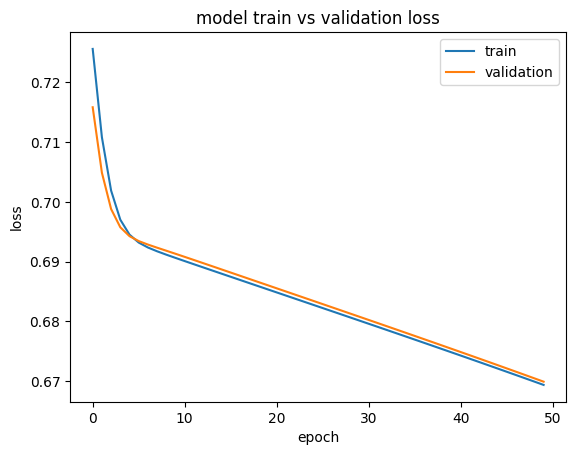

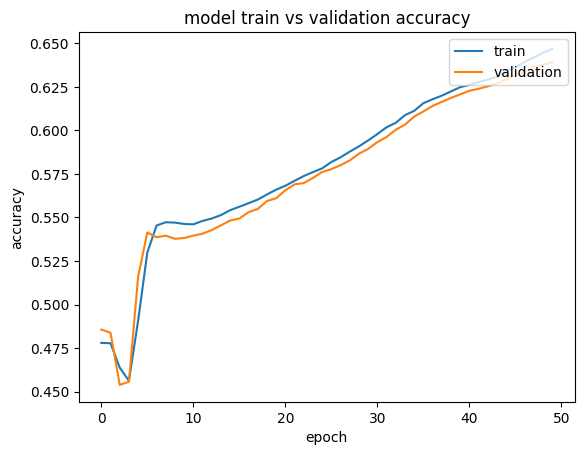

137/137 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.59      0.96      0.73      2249
           1       0.89      0.29      0.44      2123

    accuracy                           0.64      4372
   macro avg       0.74      0.63      0.59      4372
weighted avg       0.73      0.64      0.59      4372



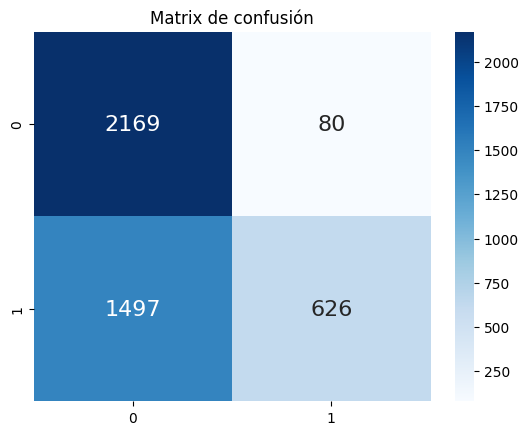

In [ ]:
df = pd.read_csv("62f1ab79cc287b001f643389_clear_final.csv")
X = df[['campaign_id',
        'traffic_source_id',
        'visitor_device_browser',
        'visitor_device_hardware_family',
        'visitor_device_hardware_model',
        'visitor_device_hardware_vendor',
        'visitor_device_os_family',
        'visitor_device_os_vendor',
        'visitor_device_os_version',
        'visitor_device_type',
        'visitor_geo_location_cityName',
        'visitor_geo_location_connection_typ',
        'visitor_geo_location_countryCode',
        'visitor_geo_location_isp',
        'visitor_geo_location_regionName',
        'visitor_tokens_adh',
        'visitor_tokens_cadid',
        'visitor_tokens_adi',
        'converted_yes',
        'converted_no']]
y = df[["landing_page_id"]]

df = pd.concat([X, y], axis=1)

# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OneHotEncoder(handle_unknown='ignore')
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
  le = LabelEncoder()
  le.fit(y_train)
  y_train_enc = le.transform(y_train)
  y_test_enc = le.transform(y_test)
  y_train_enc = to_categorical(y_train_enc)
  y_test_enc = to_categorical(y_test_enc)
  return y_train_enc, y_test_enc

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

# define the  model
model = Sequential()
model.add(Dense(250, input_dim=X_train_enc.shape[1], activation='softplus',
                kernel_initializer='lecun_uniform'))
model.add(Dense(250, kernel_initializer = 'lecun_uniform',  activation = 'softplus'))
model.add(Dense(2, kernel_initializer = 'lecun_uniform', activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='Adadelta',
              metrics=['accuracy'])

# fit the keras model on the dataset
history=model.fit(X_train_enc, y_train_enc, epochs=50, batch_size=64, validation_data=(X_test_enc, y_test_enc), shuffle=False)

# evaluate the keras model
_, accuracy = model.evaluate(X_test_enc, y_test_enc, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

loss, accuracy = model.evaluate(X_train_enc, y_train_enc, verbose=False)
print("Precisión Entrenamiento: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test_enc, y_test_enc, verbose=False)
print("Precisión Prueba:  {:.4f}".format(accuracy))


from matplotlib import pyplot
from numpy import array

# plot train and validation loss
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

# plot train and validation loss
pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test_enc)
y_pred=np.argmax(y_pred, axis=1)
y_test_enc=np.argmax(y_test_enc, axis=1)
cm = confusion_matrix(y_test_enc, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.title("Matrix de confusión")
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=True, annot_kws={"size": 16})

# Se obtiene las metricas de evaluación del modelo
from sklearn.metrics import classification_report
report = classification_report(y_test_enc, y_pred)
print(report)

# Modelo 3

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


80/80 [==============================] - 3s 21ms/step - loss: 0.1657 - accuracy: 0.9276 - val_loss: 0.0780 - val_accuracy: 0.9643
Epoch 2/10
80/80 [==============================] - 2s 20ms/step - loss: 0.0794 - accuracy: 0.9650 - val_loss: 0.0694 - val_accuracy: 0.9680
Epoch 3/10
80/80 [==============================] - 1s 12ms/step - loss: 0.0755 - accuracy: 0.9653 - val_loss: 0.0681 - val_accuracy: 0.9687
Epoch 4/10
80/80 [==============================] - 1s 15ms/step - loss: 0.0736 - accuracy: 0.9674 - val_loss: 0.0687 - val_accuracy: 0.9696
Epoch 5/10
80/80 [==============================] - 2s 22ms/step - loss: 0.0727 - accuracy: 0.9680 - val_loss: 0.0703 - val_accuracy: 0.9691
Epoch 6/10
80/80 [==============================] - 1s 13ms/step - loss: 0.0727 - accuracy: 0.9675 - val_loss: 0.0731 - val_accuracy: 0.9698
Epoch 7/10
80/80 [==============================] - 1s 13ms/step - loss: 0.0723 - accuracy: 0.9676 - val_loss: 0.0778 - val_accuracy: 0.9698
Epoch 8/10
80/80 [======

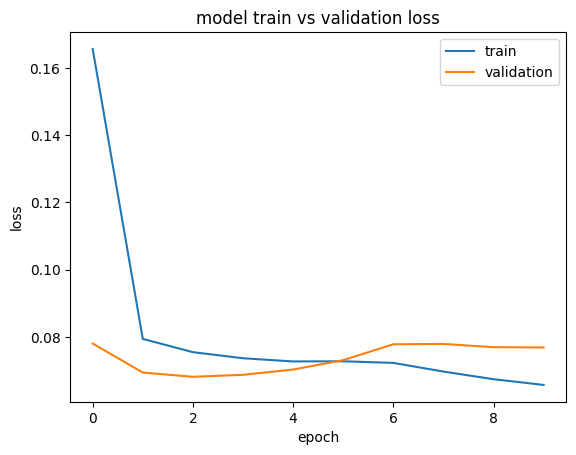

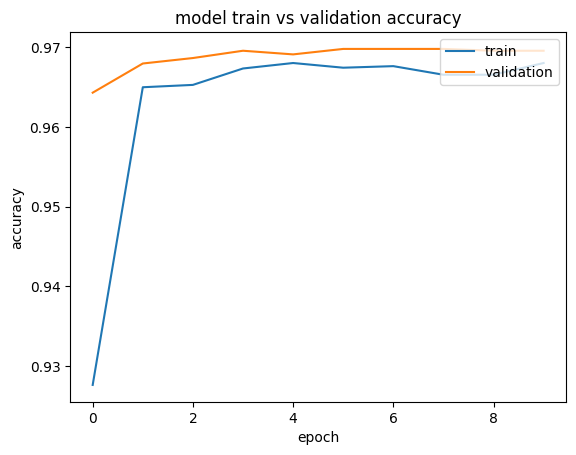

137/137 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2249
           1       1.00      0.94      0.97      2123

    accuracy                           0.97      4372
   macro avg       0.97      0.97      0.97      4372
weighted avg       0.97      0.97      0.97      4372



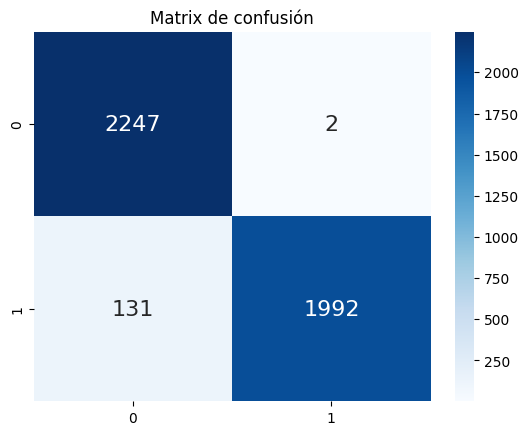

In [ ]:
df = pd.read_csv("62f1ab79cc287b001f643389_clear_final.csv")
X = df[['campaign_id',
        'traffic_source_id',
        'visitor_device_browser',
        'visitor_device_hardware_family',
        'visitor_device_hardware_model',
        'visitor_device_hardware_vendor',
        'visitor_device_os_family',
        'visitor_device_os_vendor',
        'visitor_device_os_version',
        'visitor_device_type',
        'visitor_geo_location_cityName',
        'visitor_geo_location_connection_typ',
        'visitor_geo_location_countryCode',
        'visitor_geo_location_isp',
        'visitor_geo_location_regionName',
        'visitor_tokens_adh',
        'visitor_tokens_cadid',
        'visitor_tokens_adi',
        'converted_yes',
        'converted_no']]
y = df[["landing_page_id"]]

df = pd.concat([X, y], axis=1)

# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OneHotEncoder(handle_unknown='ignore')
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
  le = LabelEncoder()
  le.fit(y_train)
  y_train_enc = le.transform(y_train)
  y_test_enc = le.transform(y_test)
  y_train_enc = to_categorical(y_train_enc)
  y_test_enc = to_categorical(y_test_enc)
  return y_train_enc, y_test_enc

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

# define the  model
model = Sequential()
model.add(Dense(250, input_dim=X_train_enc.shape[1], activation='tanh',
                kernel_initializer='glorot_uniform'))
model.add(Dense(250, kernel_initializer = 'glorot_uniform',  activation = 'tanh'))
model.add(Dense(250, kernel_initializer = 'glorot_uniform',  activation = 'tanh'))
model.add(Dense(250, kernel_initializer = 'glorot_uniform',  activation = 'tanh'))
model.add(Dense(250, kernel_initializer = 'glorot_uniform',  activation = 'tanh'))
model.add(Dense(2, kernel_initializer = 'glorot_uniform', activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='Adamax',
              metrics=['accuracy'])

# fit the keras model on the dataset
history=model.fit(X_train_enc, y_train_enc, epochs=10, batch_size=128, validation_data=(X_test_enc, y_test_enc), shuffle=False)

# evaluate the keras model
_, accuracy = model.evaluate(X_test_enc, y_test_enc, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

loss, accuracy = model.evaluate(X_train_enc, y_train_enc, verbose=False)
print("Precisión Entrenamiento: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test_enc, y_test_enc, verbose=False)
print("Precisión Prueba:  {:.4f}".format(accuracy))

from matplotlib import pyplot
from numpy import array

# plot train and validation loss
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

# plot train and validation loss
pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test_enc)
y_pred=np.argmax(y_pred, axis=1)
y_test_enc=np.argmax(y_test_enc, axis=1)
cm = confusion_matrix(y_test_enc, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.title("Matrix de confusión")
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=True, annot_kws={"size": 16})

# Se obtiene las metricas de evaluación del modelo
from sklearn.metrics import classification_report
report = classification_report(y_test_enc, y_pred)
print(report)

# Modelo 4

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Epoch 1/10
638/638 [==============================] - 8s 10ms/step - loss: 0.6937 - accuracy: 0.5216 - val_loss: 0.6925 - val_accuracy: 0.5144
Epoch 2/10
638/638 [==============================] - 2s 4ms/step - loss: 0.6920 - accuracy: 0.5221 - val_loss: 0.6924 - val_accuracy: 0.5144
Epoch 3/10
638/638 [==============================] - 2s 4ms/step - loss: 0.6920 - accuracy: 0.5221 - val_loss: 0.6923 - val_accuracy: 0.5144
Epoch 4/10
638/638 [==============================] - 3s 5ms/step - loss: 0.6919 - accuracy: 0.5221 - val_loss: 0.6923 - val_accuracy: 0.5144
Epoch 5/10
638/638 [==============================] - 2s 4ms/step - loss: 0.6918 - accuracy: 0.5221 - val_loss: 0.6922 - val_accuracy: 0.5144
Epoch 6/10
638/638 [==============================] - 2s 4ms/step - loss: 0.6917 - accuracy: 0.5221 - val_loss: 0.6922 - val_accuracy: 0.5144
Epoch 7/10
638/638 [==============================] - 2s 3ms/step - loss: 0.6917 - accuracy: 0.5221 - val_loss: 0.6921 - val_accuracy: 0.5144
Epoch

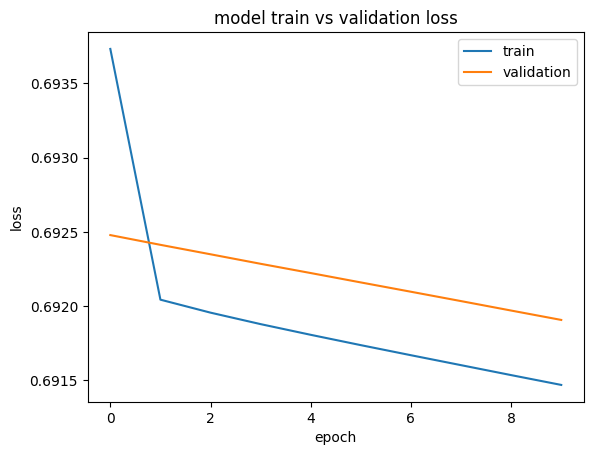

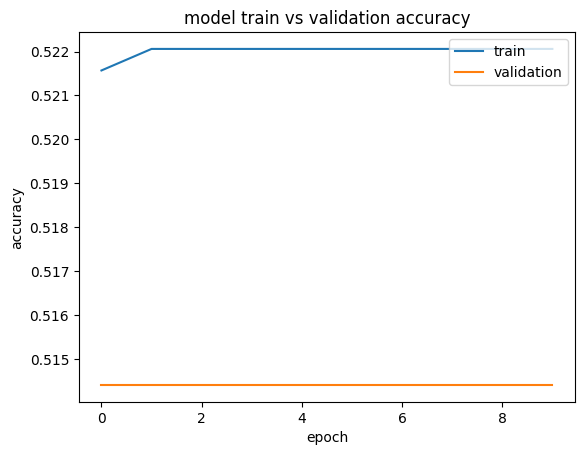

137/137 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.51      1.00      0.68      2249
           1       0.00      0.00      0.00      2123

    accuracy                           0.51      4372
   macro avg       0.26      0.50      0.34      4372
weighted avg       0.26      0.51      0.35      4372



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


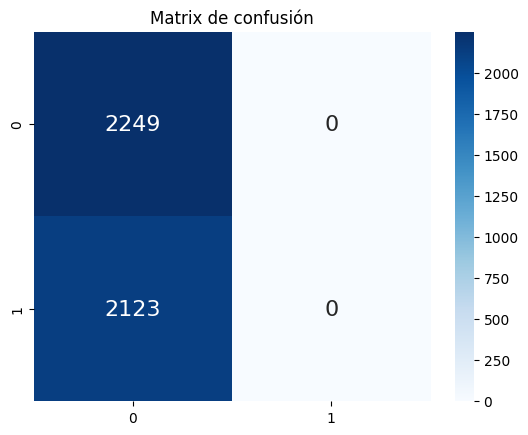

In [ ]:
df = pd.read_csv("62f1ab79cc287b001f643389_clear_final.csv")
X = df[['campaign_id',
        'traffic_source_id',
        'visitor_device_browser',
        'visitor_device_hardware_family',
        'visitor_device_hardware_model',
        'visitor_device_hardware_vendor',
        'visitor_device_os_family',
        'visitor_device_os_vendor',
        'visitor_device_os_version',
        'visitor_device_type',
        'visitor_geo_location_cityName',
        'visitor_geo_location_connection_typ',
        'visitor_geo_location_countryCode',
        'visitor_geo_location_isp',
        'visitor_geo_location_regionName',
        'visitor_tokens_adh',
        'visitor_tokens_cadid',
        'visitor_tokens_adi',
        'converted_yes',
        'converted_no']]
y = df[["landing_page_id"]]

df = pd.concat([X, y], axis=1)

# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OneHotEncoder(handle_unknown='ignore')
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
  le = LabelEncoder()
  le.fit(y_train)
  y_train_enc = le.transform(y_train)
  y_test_enc = le.transform(y_test)
  y_train_enc = to_categorical(y_train_enc)
  y_test_enc = to_categorical(y_test_enc)
  return y_train_enc, y_test_enc

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

# define the  model
model = Sequential()
model.add(Dense(250, input_dim=X_train_enc.shape[1], activation='sigmoid',
                kernel_initializer='glorot_normal'))
model.add(Dense(250, kernel_initializer = 'glorot_normal',  activation = 'sigmoid'))
model.add(Dense(250, kernel_initializer = 'glorot_normal',  activation = 'sigmoid'))
model.add(Dense(2, kernel_initializer = 'glorot_normal', activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='Adagrad',
              metrics=['accuracy'])

# fit the keras model on the dataset
history=model.fit(X_train_enc, y_train_enc, epochs=10, batch_size=16, validation_data=(X_test_enc, y_test_enc), shuffle=False)

# evaluate the keras model
_, accuracy = model.evaluate(X_test_enc, y_test_enc, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

loss, accuracy = model.evaluate(X_train_enc, y_train_enc, verbose=False)
print("Precisión Entrenamiento: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test_enc, y_test_enc, verbose=False)
print("Precisión Prueba:  {:.4f}".format(accuracy))

from matplotlib import pyplot
from numpy import array

# plot train and validation loss
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

# plot train and validation loss
pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test_enc)
y_pred=np.argmax(y_pred, axis=1)
y_test_enc=np.argmax(y_test_enc, axis=1)
cm = confusion_matrix(y_test_enc, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.title("Matrix de confusión")
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=True, annot_kws={"size": 16})

# Se obtiene las metricas de evaluación del modelo
from sklearn.metrics import classification_report
report = classification_report(y_test_enc, y_pred)
print(report)

# Modelo 5

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


319/319 [==============================] - 3s 6ms/step - loss: 0.6860 - accuracy: 0.5540 - val_loss: 0.6809 - val_accuracy: 0.5990
Epoch 2/10
319/319 [==============================] - 1s 4ms/step - loss: 0.6764 - accuracy: 0.6087 - val_loss: 0.6714 - val_accuracy: 0.6622
Epoch 3/10
319/319 [==============================] - 1s 4ms/step - loss: 0.6670 - accuracy: 0.6532 - val_loss: 0.6617 - val_accuracy: 0.6871
Epoch 4/10
319/319 [==============================] - 1s 3ms/step - loss: 0.6573 - accuracy: 0.6831 - val_loss: 0.6518 - val_accuracy: 0.7075
Epoch 5/10
319/319 [==============================] - 1s 3ms/step - loss: 0.6471 - accuracy: 0.7065 - val_loss: 0.6413 - val_accuracy: 0.7267
Epoch 6/10
319/319 [==============================] - 1s 4ms/step - loss: 0.6364 - accuracy: 0.7288 - val_loss: 0.6301 - val_accuracy: 0.7507
Epoch 7/10
319/319 [==============================] - 1s 4ms/step - loss: 0.6250 - accuracy: 0.7482 - val_loss: 0.6181 - val_accuracy: 0.7646
Epoch 8/10
319/31

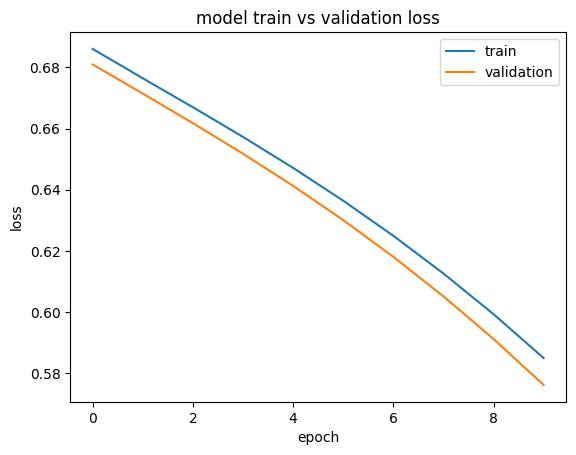

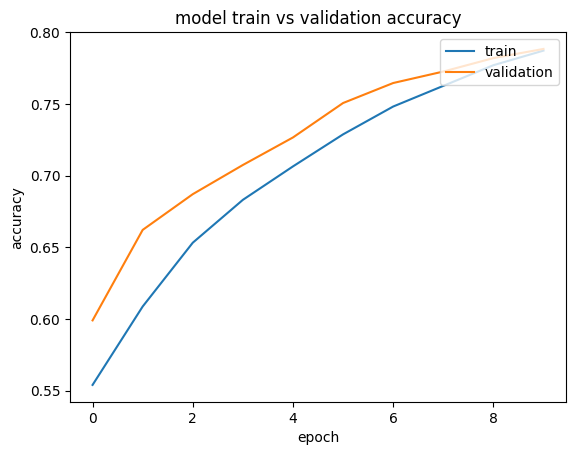

137/137 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.77      0.84      0.80      2249
           1       0.81      0.73      0.77      2123

    accuracy                           0.79      4372
   macro avg       0.79      0.79      0.79      4372
weighted avg       0.79      0.79      0.79      4372



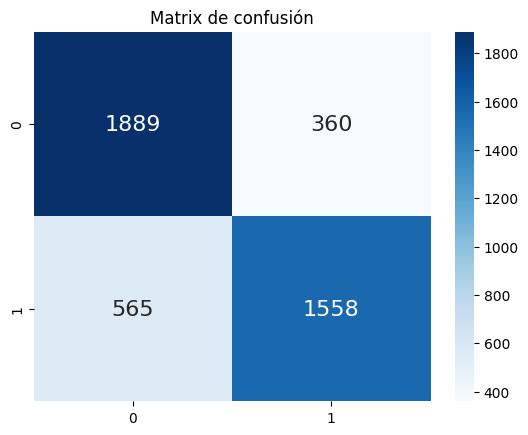

In [ ]:
df = pd.read_csv("62f1ab79cc287b001f643389_clear_final.csv")
X = df[['campaign_id',
        'traffic_source_id',
        'visitor_device_browser',
        'visitor_device_hardware_family',
        'visitor_device_hardware_model',
        'visitor_device_hardware_vendor',
        'visitor_device_os_family',
        'visitor_device_os_vendor',
        'visitor_device_os_version',
        'visitor_device_type',
        'visitor_geo_location_cityName',
        'visitor_geo_location_connection_typ',
        'visitor_geo_location_countryCode',
        'visitor_geo_location_isp',
        'visitor_geo_location_regionName',
        'visitor_tokens_adh',
        'visitor_tokens_cadid',
        'visitor_tokens_adi',
        'converted_yes',
        'converted_no']]
y = df[["landing_page_id"]]

df = pd.concat([X, y], axis=1)

# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OneHotEncoder(handle_unknown='ignore')
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
  le = LabelEncoder()
  le.fit(y_train)
  y_train_enc = le.transform(y_train)
  y_test_enc = le.transform(y_test)
  y_train_enc = to_categorical(y_train_enc)
  y_test_enc = to_categorical(y_test_enc)
  return y_train_enc, y_test_enc

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

# define the  model
model = Sequential()
model.add(Dense(250, input_dim=X_train_enc.shape[1], activation='hard_sigmoid',
                kernel_initializer='he_uniform'))
model.add(Dense(2, kernel_initializer = 'he_uniform', activation='hard_sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='SGD',
              metrics=['accuracy'])

# fit the keras model on the dataset
history=model.fit(X_train_enc, y_train_enc, epochs=10, batch_size=32, validation_data=(X_test_enc, y_test_enc), shuffle=False)

# evaluate the keras model
_, accuracy = model.evaluate(X_test_enc, y_test_enc, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

loss, accuracy = model.evaluate(X_train_enc, y_train_enc, verbose=False)
print("Precisión Entrenamiento: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test_enc, y_test_enc, verbose=False)
print("Precisión Prueba:  {:.4f}".format(accuracy))

from matplotlib import pyplot
from numpy import array

# plot train and validation loss
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

# plot train and validation loss
pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test_enc)
y_pred=np.argmax(y_pred, axis=1)
y_test_enc=np.argmax(y_test_enc, axis=1)
cm = confusion_matrix(y_test_enc, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.title("Matrix de confusión")
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=True, annot_kws={"size": 16})

# Se obtiene las metricas de evaluación del modelo
from sklearn.metrics import classification_report
report = classification_report(y_test_enc, y_pred)
print(report)

# Modelo 6

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Epoch 1/50
80/80 [==============================] - 12s 64ms/step - loss: 0.7896 - accuracy: 0.6685 - val_loss: 0.2297 - val_accuracy: 0.9398
Epoch 2/50
80/80 [==============================] - 3s 36ms/step - loss: 0.2139 - accuracy: 0.9525 - val_loss: 0.1308 - val_accuracy: 0.9623
Epoch 3/50
80/80 [==============================] - 3s 37ms/step - loss: 0.1301 - accuracy: 0.9599 - val_loss: 0.1044 - val_accuracy: 0.9673
Epoch 4/50
80/80 [==============================] - 4s 47ms/step - loss: 0.1544 - accuracy: 0.9603 - val_loss: 0.1463 - val_accuracy: 0.9673
Epoch 5/50
80/80 [==============================] - 3s 38ms/step - loss: 0.1562 - accuracy: 0.9604 - val_loss: 0.2116 - val_accuracy: 0.9625
Epoch 6/50
80/80 [==============================] - 2s 30ms/step - loss: 0.1378 - accuracy: 0.9603 - val_loss: 0.0945 - val_accuracy: 0.9684
Epoch 7/50
80/80 [==============================] - 2s 29ms/step - loss: 0.1195 - accuracy: 0.9657 - val_loss: 0.0719 - val_accuracy: 0.9705
Epoch 8/50
8

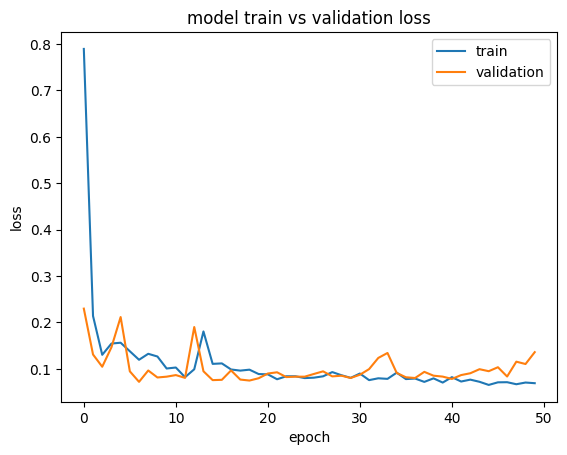

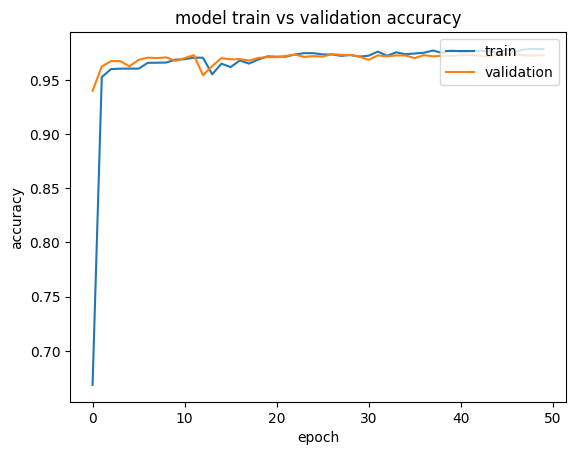

137/137 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2249
           1       0.99      0.95      0.97      2123

    accuracy                           0.97      4372
   macro avg       0.97      0.97      0.97      4372
weighted avg       0.97      0.97      0.97      4372



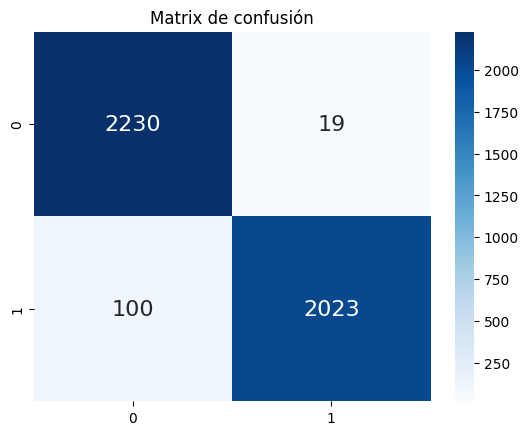

In [ ]:
df = pd.read_csv("62f1ab79cc287b001f643389_clear_final.csv")
X = df[['campaign_id',
        'traffic_source_id',
        'visitor_device_browser',
        'visitor_device_hardware_family',
        'visitor_device_hardware_model',
        'visitor_device_hardware_vendor',
        'visitor_device_os_family',
        'visitor_device_os_vendor',
        'visitor_device_os_version',
        'visitor_device_type',
        'visitor_geo_location_cityName',
        'visitor_geo_location_connection_typ',
        'visitor_geo_location_countryCode',
        'visitor_geo_location_isp',
        'visitor_geo_location_regionName',
        'visitor_tokens_adh',
        'visitor_tokens_cadid',
        'visitor_tokens_adi',
        'converted_yes',
        'converted_no']]
y = df[["landing_page_id"]]

df = pd.concat([X, y], axis=1)

# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OneHotEncoder(handle_unknown='ignore')
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
  le = LabelEncoder()
  le.fit(y_train)
  y_train_enc = le.transform(y_train)
  y_test_enc = le.transform(y_test)
  y_train_enc = to_categorical(y_train_enc)
  y_test_enc = to_categorical(y_test_enc)
  return y_train_enc, y_test_enc

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

# define the  model
model = Sequential()
model.add(Dense(250, input_dim=X_train_enc.shape[1], activation='relu',
                kernel_initializer='uniform'))
model.add(Dropout(0.4))
model.add(Dense(250, kernel_initializer = 'uniform',  activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(250, kernel_initializer = 'uniform',  activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(250, kernel_initializer = 'uniform',  activation = 'relu'))
model.add(Dense(2, kernel_initializer = 'uniform', activation='relu'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

# fit the keras model on the dataset
history=model.fit(X_train_enc, y_train_enc, epochs=50, batch_size=128, validation_data=(X_test_enc, y_test_enc), shuffle=False)

# evaluate the keras model
_, accuracy = model.evaluate(X_test_enc, y_test_enc, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

loss, accuracy = model.evaluate(X_train_enc, y_train_enc, verbose=False)
print("Precisión Entrenamiento: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test_enc, y_test_enc, verbose=False)
print("Precisión Prueba:  {:.4f}".format(accuracy))

from matplotlib import pyplot
from numpy import array

# plot train and validation loss
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

# plot train and validation loss
pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test_enc)
y_pred=np.argmax(y_pred, axis=1)
y_test_enc=np.argmax(y_test_enc, axis=1)
cm = confusion_matrix(y_test_enc, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.title("Matrix de confusión")
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=True, annot_kws={"size": 16})

# Se obtiene las metricas de evaluación del modelo
from sklearn.metrics import classification_report
report = classification_report(y_test_enc, y_pred)
print(report)